<h1> Quantum measurements, Heisenberg's uncertainty principle and Bell inequalities </h1>

<h2>Simulating a measurement on a qubit</h2>

<h3>We import all the required libraries</h3>

We also import some extra ones just in case

In [16]:
%matplotlib inline
#from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
from qutip import *
plt.rcParams["figure.figsize"] = (12,9)

In [17]:
# Define the Phv measurement operator:
MOpz= sigmaz()
MOpx= sigmax()
MOpy= sigmay()

In [18]:
ψ = ((2-1j)*basis(2,0)+(1-3j)*basis(2,1)).unit()
ψ2=(basis(2,0)+basis(2,1)).unit()
ψ3=basis(2,0)

<h3> Function to generate the lab results </h3>

The function to generate a data set of $N$ possible results for the measure of the 3 values of the spin operators on a randomly generated state.

The function uses the numpy function 

random.choice(set_of_allowed_results, number_of_results_to_generate, probabilities_of_the_allowed_results)


In [19]:
def GenerateLabResults(N):
    state=((np.random.random()+1j*np.random.random())*basis(2,0)+(np.random.random())*basis(2,1)).unit()
    print(state)
    oper=[0.5*sigmax(), 0.5*sigmay(), 0.5*sigmaz()]
    data=[]
    for k in oper:
        eigenv1 = k.eigenstates()[1][0]
        eigenv2 = k.eigenstates()[1][1]
        allowed_results = k.eigenstates()[0]
        probability_amps = [qo.full()[0][0] for qo in [eigenv1.dag()*state, eigenv2.dag()*state]]
        pvals = [abs(pa.conjugate()*pa) for pa in probability_amps]
        dataK=np.random.choice(allowed_results,size=N, p=pvals)
        data.append(dataK)
    return data

<h3> Statistical tools of the set of measurements </h3>

We have created a set of possible lab results for the three operators. From these "experimental" results we can try to identify their properties:

* data.var(): variance of the set "data"

* data.mean(): mean of the set "data"

* plt.hist(real(data)): represent a histogram from the results in the set "data"

In [20]:
datax,datay,dataz=GenerateLabResults(1000000)
sx=datax.mean()
sy=datay.mean()
sz=dataz.mean()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.95082641+0.30822441j]
 [0.03044409+0.j        ]]


In [21]:
print("Variance: ",datax.var())
print("Mean: ",datax.mean())

Variance:  0.24915743327100007
Mean:  0.029027


In [22]:
print("Variance: ",datay.var())
print("Mean: ",datay.mean())

Variance:  0.24993149127099998
Mean:  -0.008277


In [23]:
print("Variance: ",dataz.var())
print("Mean: ",dataz.mean())

Variance:  0.0009231462239999999
Mean:  0.499076


(array([470973.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 529027.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

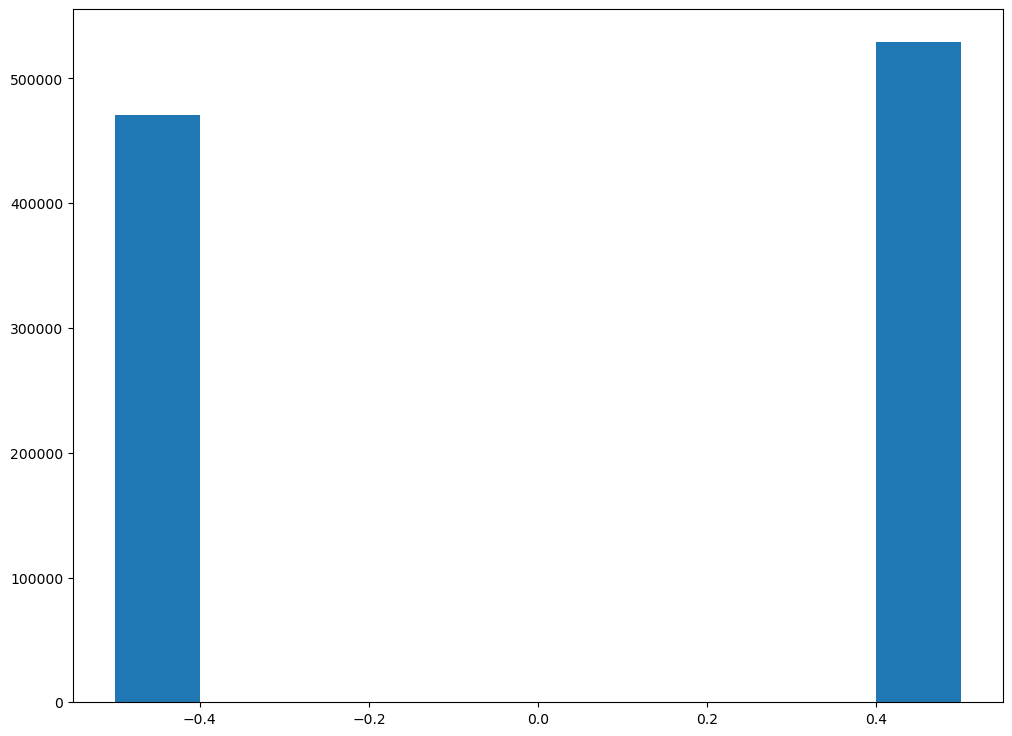

In [24]:
plt.hist(np.real(datax))

(array([549624.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 450376.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

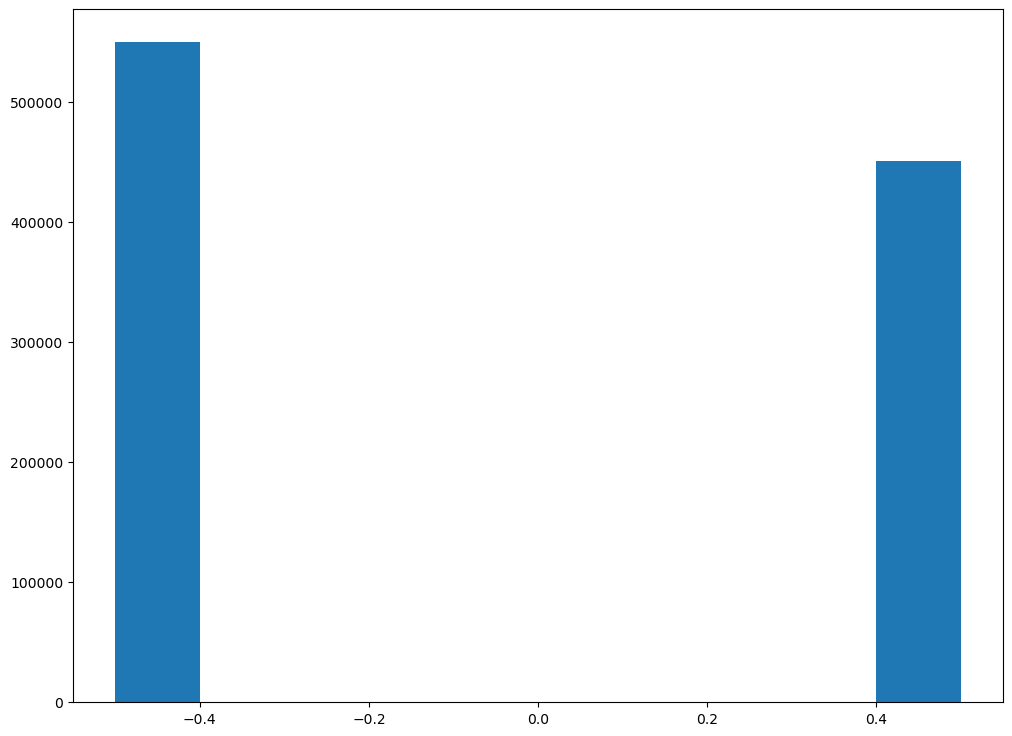

In [10]:
plt.hist(np.real(datay))

(array([ 13538.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 986462.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

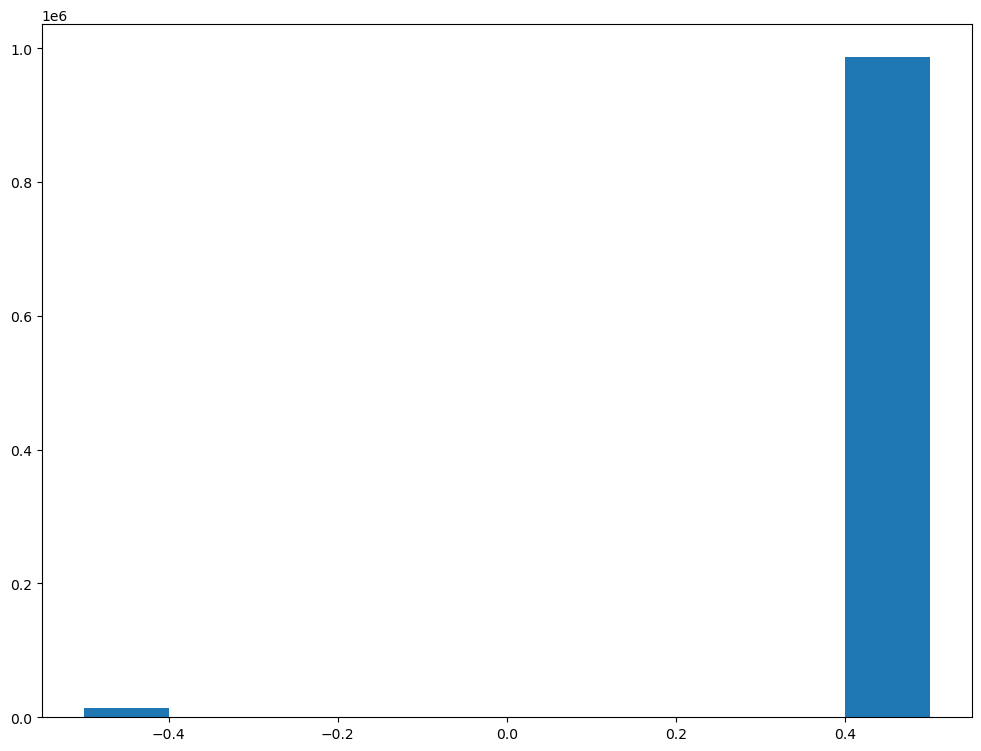

In [11]:
plt.hist(np.real(dataz))

In [12]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.5
Numpy,1.24.3
SciPy,1.11.1
matplotlib,3.7.2
Cython,3.0.8
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,8.15.0
Python,"3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]


In [27]:
#4.1 La medida cuántica
#M1: Según el postulado I, se debería poder determinar el estado salvo por una constante compleja. Sin embargo, como está normalizado y su segunda componente es real, solo hay dos posibilidades, por lo que casi se puede determinar completamente, a falta del signo.
#Básicamente el sistema a resolver es a^2+b^2-c^2=2*m_z; x=ac; y=-bc

m_x=datax.mean()
m_y=datay.mean()
m_z=dataz.mean()

c=np.sqrt(0.5-m_z)
b=-m_y/c
a=m_x/c

print(((a+1j*b)*basis(2,0)+(c)*basis(2,1)))

#M2: Por el Teorema del Límite Central, la dependencia con N del error de las medias es de la forma 1/sqrt(N).
#El error de las medias (m_x,m_y,m_z) es proporcional a 1/sqrt(N). Si se propaga a (a,b,c), se ve que siguen la misma proporcionalidad.

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.95491819+0.27229331j]
 [0.03039737+0.j        ]]


In [26]:
#4.2 El principio de incertidumbre

#I1 Sean A y B operadores autoadjuntos (adj(A)=A, adj(B)=B). Entonces:
#Su producto no es necesariamente autoadjunto. Demostración: adj(AB)=adj(B)*adj(A)=BA => Solo lo es si A y B conmutan (AB=BA => adj(AB)=AB)
#Su anticonmutador ({A,B}=AB+BA) siempre es autoadjunto: adj({A,B})=adj(AB+BA)=adj(AB)+adj(BA)=adj(B)*adj(A)+adj(A)*adj(B)=BA+AB=AB+BA={A,B}
#Su conmutador ([A,B]=-i(AB-BA)) siempre es autoadjunto: adj([A,B])=adj(-i(AB-BA))=i*adj(AB-BA)=i*(adj(AB)-adj(BA))=i*(adj(B)*adj(A)-adj(A)*adj(B))=i*(BA-AB)=-i(AB-BA)=[A,B]

#I2 
fi1=basis(2,0)
fi2=(0.16+1j*0.801)*basis(2,0)-(0.32+1j*0.48)*basis(2,1)
fi3=(basis(2,0)+basis(2,1)).unit()

def Heisenberg(A,B,fi):
    C=A*B-B*A
    if(np.sqrt(variance(A,fi))*np.sqrt(variance(B,fi))>=expect(C,fi)/2):
        print("True")
    else:
        print("False")

Heisenberg(sigmax(),sigmaz(),fi1)
Heisenberg(sigmax(),sigmaz(),fi2)
Heisenberg(sigmax(),sigmaz(),fi3)

#Nunca se van a poder medir
    

True
True
True


In [15]:
#4.3 El teorema de Bell

#B1
fi1=1
fi2=(tensor(basis(2,0), basis(2,0))+tensor(basis(2,1), basis(2,1))).unit()
fi3=1
fi4=(tensor(basis(2,0), basis(2,1))+tensor(basis(2,0), basis(2,0))).unit()

Q=tensor(sigmaz(),qeye(2))
R=tensor(sigmax(),qeye(2))
S=-1/np.sqrt(2)*tensor(qeye(2),sigmaz()*sigmaz()+sigmax()*sigmax())
T=1/np.sqrt(2)*tensor(qeye(2),sigmaz()*sigmaz()-sigmax()*sigmax())

def Bell(fi):
    C=Q*S+R*S+R*T-Q*T
    if(expect(C,fi)<=2):
        print("True")
    else:
        print("False")

#Bell(fi1)
Bell(fi2)
#Bell(fi3)
Bell(fi4)

True
True
